In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/home/salini/Downloads/CHRISTY/metro.csv")

In [3]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
data.shape

(48204, 9)

In [5]:
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [6]:
data = data.drop(['weather_description'],axis=1)

In [7]:
data.dtypes

holiday            object
temp              float64
rain_1h           float64
snow_1h           float64
clouds_all          int64
weather_main       object
date_time          object
traffic_volume      int64
dtype: object

In [8]:
data.isna().sum()

holiday           0
temp              0
rain_1h           0
snow_1h           0
clouds_all        0
weather_main      0
date_time         0
traffic_volume    0
dtype: int64

In [19]:
import datetime
data['date_time'] = data['date_time'].apply(lambda x : int(x.split()[1].split(":")[0]))

In [20]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,9,5545
1,None,289.36,0.0,0.0,75,Clouds,10,4516
2,None,289.58,0.0,0.0,90,Clouds,11,4767
3,None,290.13,0.0,0.0,90,Clouds,12,5026
4,None,291.14,0.0,0.0,75,Clouds,13,4918


In [21]:
data=pd.get_dummies(data)

In [22]:
numcols=data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index

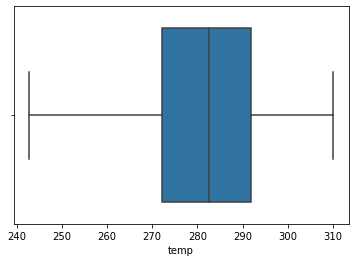

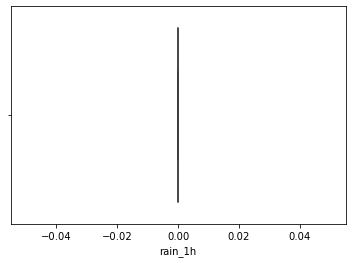

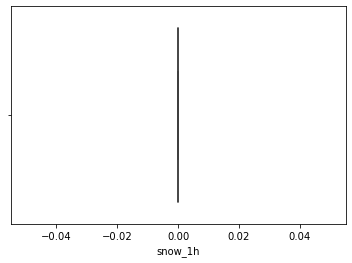

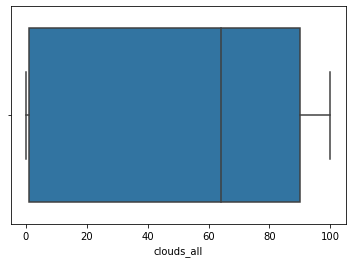

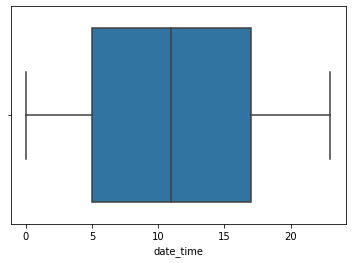

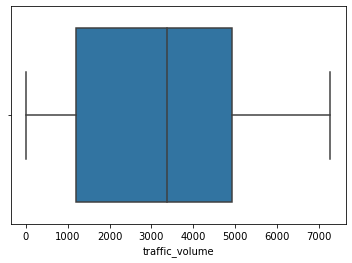

In [23]:
for x in numcols:
    sns.boxplot(data[x])
    plt.show()

In [24]:
for x in numcols:
    descr=data[x].describe()
    IQR=descr['75%']-descr['25%']
    upper_limit=descr['75%']+1.5*IQR
    lower_limit=descr['25%']-1.5*IQR
    data[x][data[x]>upper_limit]=upper_limit
    data[x][data[x]<lower_limit]=lower_limit

<ipython-input-24-9ab08303e841>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]>upper_limit]=upper_limit
<ipython-input-24-9ab08303e841>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]<lower_limit]=lower_limit


In [25]:
X=data.drop(['traffic_volume'],axis=1)
y=data['traffic_volume']

In [26]:
X.head()

,temp,rain_1h,snow_1h,clouds_all,date_time,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,...,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
0,288.28,0.0,0.0,40,9,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,289.36,0.0,0.0,75,10,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,289.58,0.0,0.0,90,11,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,290.13,0.0,0.0,90,12,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,291.14,0.0,0.0,75,13,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [27]:
y.head()

0    5545
1    4516
2    4767
3    5026
4    4918
Name: traffic_volume, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33,random_state=50) 

In [29]:
from sklearn.model_selection import GridSearchCV #GridSearchCV is for parameter tuning
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [30]:
n_estimators=[75,100] #number of decision trees in the forest, default = 100
criterion=['mse'] #criteria for choosing nodes default = 'mse'
max_depth=[3,5,10] #maximum number of nodes in a tree default = None (it will go till all possible nodes)
#max_features = ['sqrt']
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth} #this will undergo 2*1*3 = 6 iterations

In [31]:
RFR_reg = GridSearchCV(regressor, parameters)
RFR_reg.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [3, 5, 10],
                         'n_estimators': [75, 100]})

In [32]:
RFR_reg.best_params_

{'criterion': 'mse', 'max_depth': 10, 'n_estimators': 100}

In [33]:
regressor = RandomForestRegressor(criterion = "mse",max_depth = 10 , n_estimators = 75)
regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=75)

In [34]:
ypred = regressor.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error #calculating MSE
MSE=mean_squared_error(ypred,y_test)
print("MSE:",MSE)

MSE: 866441.6432446699


In [36]:
import math
math.sqrt(MSE)

930.8284714407214